<img align="center" width="500" height="500" src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg">

# 1. Giới thiều về thư viện seaborn
Seaborn là một trong những thư viện bổ sung cho matplotlib, các APIs xây dựng trên thư viện Matplotlib cung cấp các lựa chọn cho các kiểu mặc định và màu sắc, định nghĩa các chức năng cấp cao đơn giản cho các kiểu thống kê chung và tích hợp với các chức năng do Pandas DataFrames cung cấp.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.11.2'

**Thiết lập style**

In [3]:
%matplotlib inline
sns.set_style("darkgrid")
sns.set_theme()

# 2. Biểu đồ phân tích thống kê

In [4]:
data = np.random.multivariate_normal([0, 0], [[10, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

## Đồ thị Histogram

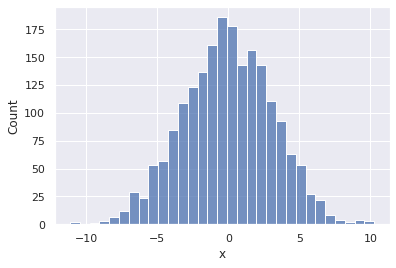

In [5]:
sns.histplot(data['x']);

## Đường mật độ ước tính(Kernel density estimate)

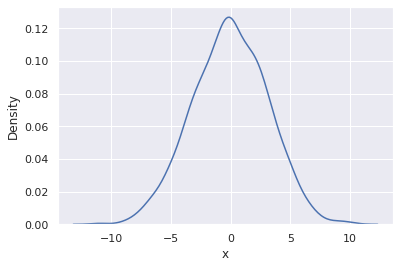

In [6]:
sns.kdeplot(data=data['x']);

## Kết hợp đồ thị Histogram + KDE

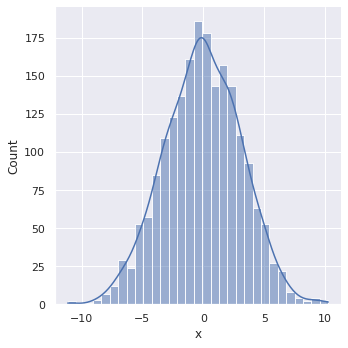

In [7]:
sns.displot(data=data['x'], kde=True);

## Đồ thị joint plot

In [8]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

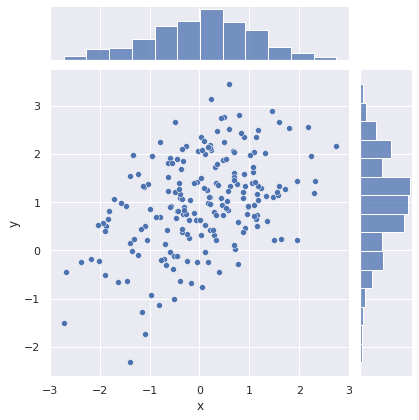

In [9]:
sns.jointplot(x="x", y="y", data=df);

**Biểu diễn dưới dạng thùng lục giác**

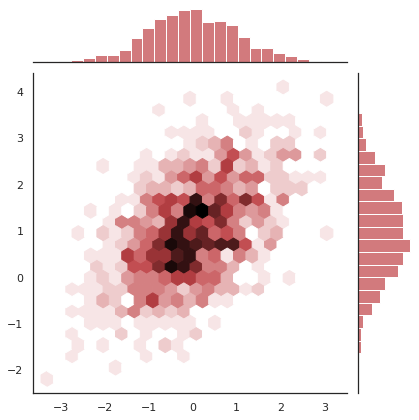

In [10]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="r");

**Sử dụng KDE**

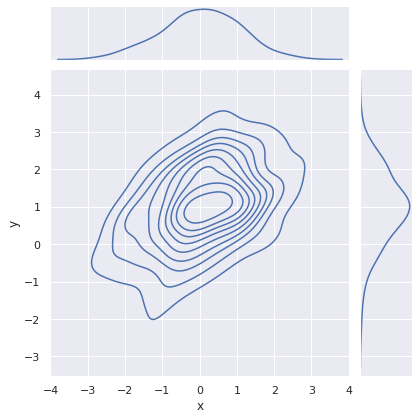

In [11]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

**Thêm phương thức rug**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


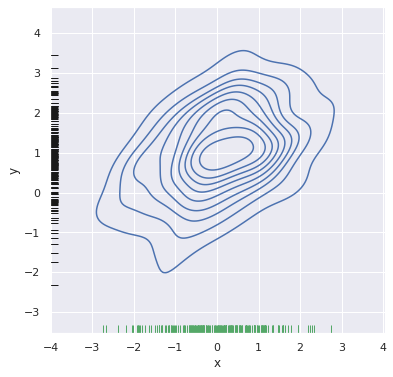

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax,color='k');
plt.show()

**Kết hợp biểu đồ phân tán bằng plot_joint** 

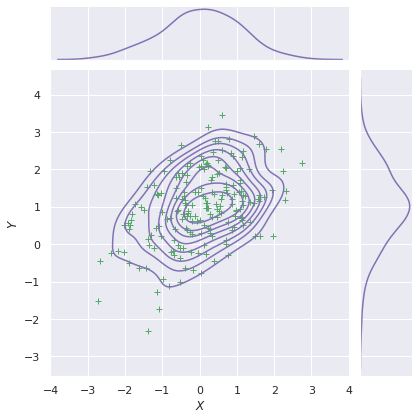

In [13]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")

g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");
plt.show()

## Biểu diễn hồi quy từ dữ liệu phân tán

In [14]:
tips_df = sns.load_dataset('tips')

In [15]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


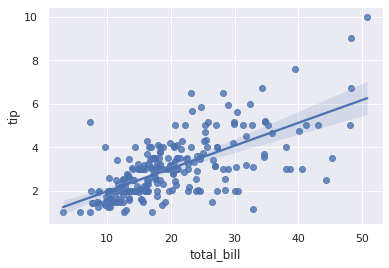

In [16]:
sns.regplot(x="total_bill", y="tip", data=tips_df);

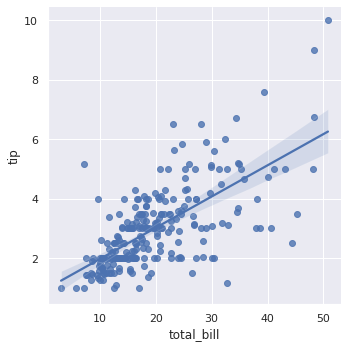

In [17]:
sns.lmplot(x="total_bill", y="tip", data=tips_df);

## Biểu đồ swarmplot

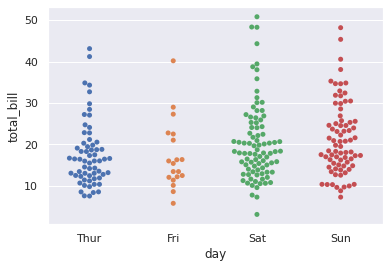

In [18]:
sns.swarmplot(x="day", y="total_bill", data=tips_df);

Cho ta thấy quan sát ở các cấp độ khác nhau.

## Biểu đồ boxplot

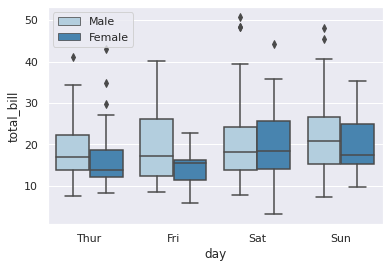

In [19]:
sns.boxplot(data=tips_df, x="day", y="total_bill", hue="sex", palette='Blues');

plt.legend(loc=0);

Mô tả phân bố của dữ liệu quan sát.

## Biểu đồ violinplot

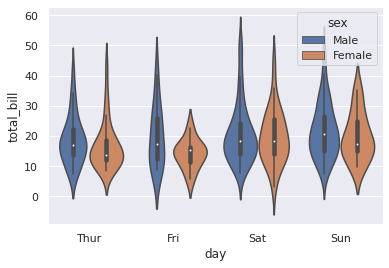

In [20]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips_df);

## Biểu đồ barplot

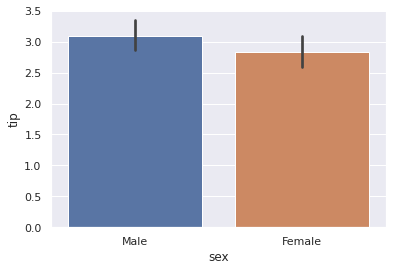

In [21]:
sns.barplot(data=tips_df, x="sex", y="tip", estimator=np.mean);

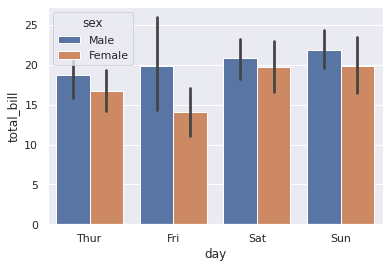

In [22]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips_df);

Cho phép ta ước lượng thống kê, để chỉ ra xu hướng trung tâm và khoảng tin cậy.

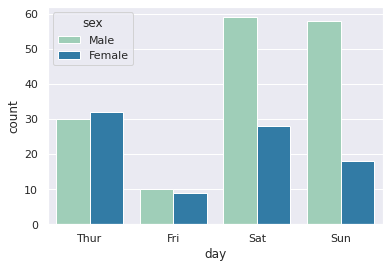

In [23]:
sns.countplot(x="day", data=tips_df, palette="YlGnBu",hue="sex");

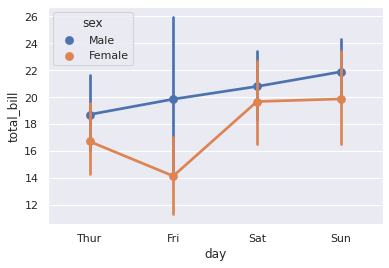

In [24]:
sns.pointplot(x="day", y="total_bill", hue="sex", data=tips_df);

## Kỹ thuật chia tập con khi vẽ
## `FacetGrid()` và `PairGrid()`

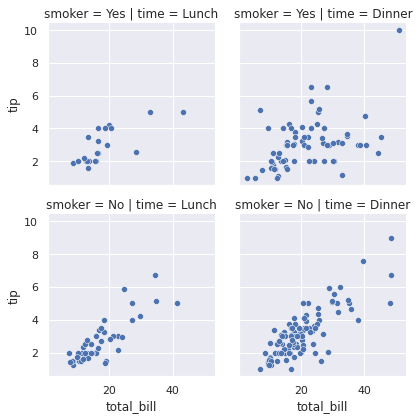

In [25]:
tips_fg = sns.FacetGrid(data=tips_df, row="smoker", col="time")
tips_fg.map(sns.scatterplot,  'total_bill', 'tip');

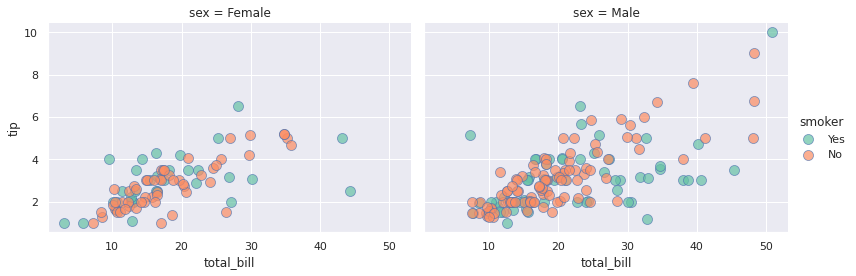

In [26]:
kwargs= dict(s=100, edgecolor='b', alpha=0.7)
new_fg = sns.FacetGrid(data=tips_df, col="sex",
                       hue="smoker",
                       col_order=["Female", "Male"],
                       palette='Set2',
                       height=4, aspect=1.4,
                       legend_out=True)

new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kwargs)

new_fg.add_legend();

In [27]:
iris = sns.load_dataset("iris")

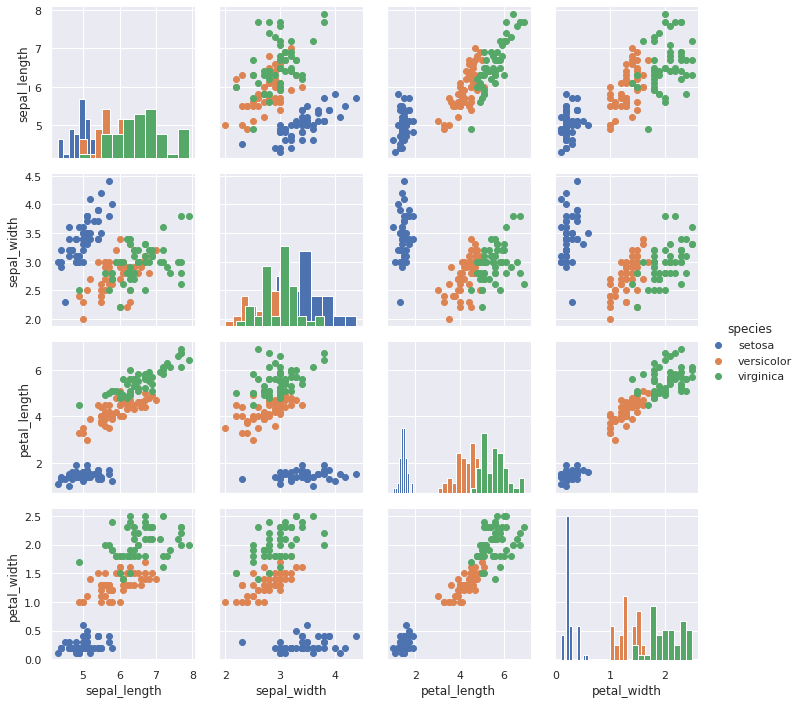

In [28]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


## Đồ thị joint plot nhiều biến

In [29]:
penguins_df = sns.load_dataset('penguins')

In [30]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


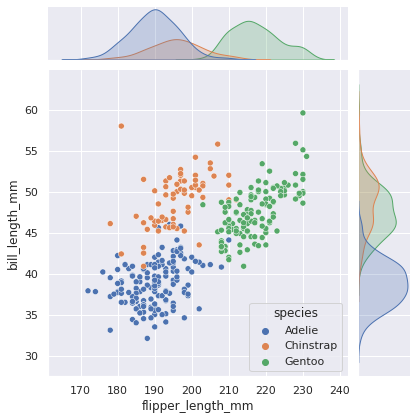

In [31]:
sns.jointplot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm", hue="species");

## Đồ thị pairplot bắt cặp

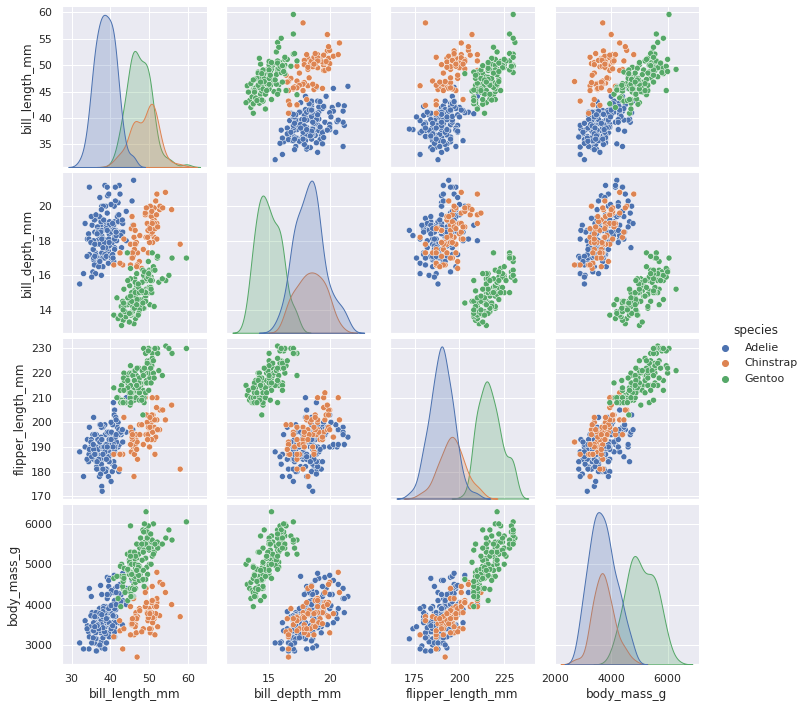

In [32]:
sns.pairplot(data=penguins_df, hue="species");

## Đồ thị heatmap

In [33]:
flights_df = sns.load_dataset("flights")

In [34]:
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


**Chuyển đổi dataframe lại bằng pivot_table**

In [35]:
flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers')

In [36]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


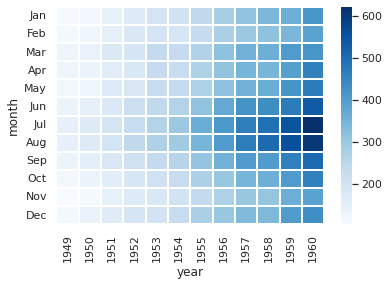

In [37]:
sns.heatmap(data=flights, cmap='Blues', linecolor='white', linewidths=1);

In [38]:
cereal_df = pd.read_csv('cereal.csv')

In [39]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [40]:
fields = ['shelf', 'weight', 'cups', 'rating']
cereal_df_new = cereal_df.drop(fields, axis=1)
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [41]:
cereal_corr = cereal_df_new.corr()
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [42]:
ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [43]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [44]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

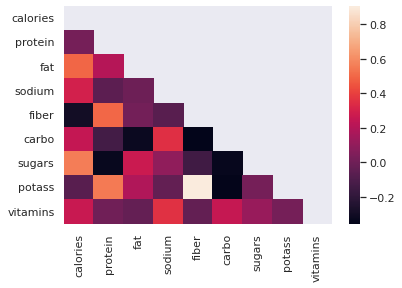

In [45]:
sns.heatmap(data=cereal_corr, mask=mask);

In [46]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [47]:
adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]

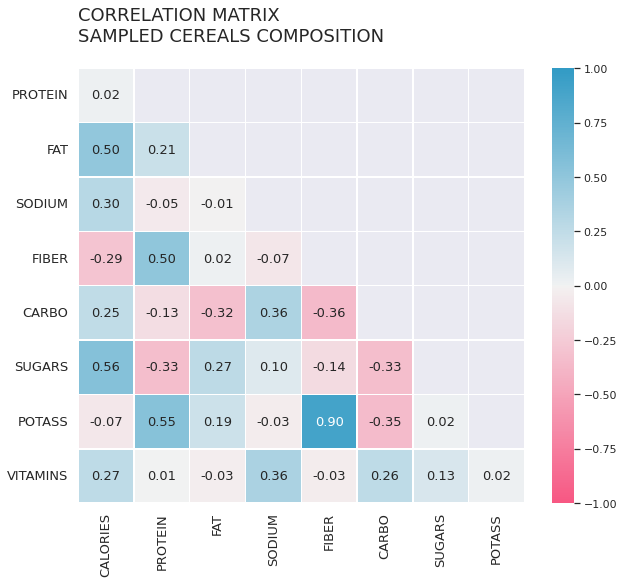

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);